<a href="https://colab.research.google.com/github/Priyadharshini411/Priyadharshini411/blob/main/COVID19_Symptoms_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv('/content/covid19_patient_symptoms_diagnosis.csv')
df.head()

,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,2,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,3,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,4,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,5,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


In [6]:
# Check number of rows and columns
df.shape

(5000, 18)

In [7]:
# Display column names, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   fever                 5000 non-null   int64  
 4   dry_cough             5000 non-null   int64  
 5   sore_throat           5000 non-null   int64  
 6   fatigue               5000 non-null   int64  
 7   headache              5000 non-null   int64  
 8   shortness_of_breath   5000 non-null   int64  
 9   loss_of_smell         5000 non-null   int64  
 10  loss_of_taste         5000 non-null   int64  
 11  oxygen_level          5000 non-null   int64  
 12  body_temperature      5000 non-null   float64
 13  comorbidity           2275 non-null   object 
 14  travel_history        5000 non-null   int64  
 15  contact_with_patient 

In [8]:
# Print all column names in the dataset
df.columns


Index(['patient_id', 'age', 'gender', 'fever', 'dry_cough', 'sore_throat',
       'fatigue', 'headache', 'shortness_of_breath', 'loss_of_smell',
       'loss_of_taste', 'oxygen_level', 'body_temperature', 'comorbidity',
       'travel_history', 'contact_with_patient', 'chest_pain', 'covid_result'],
      dtype='object')

In [9]:
# Check missing values in each column
df.isnull().sum()


,0
patient_id,0
age,0
gender,0
fever,0
dry_cough,0
sore_throat,0
fatigue,0
headache,0
shortness_of_breath,0
loss_of_smell,0


In [10]:
# Display statistical summary of numerical columns
df.describe()


,patient_id,age,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,travel_history,contact_with_patient,chest_pain,covid_result
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,44.380600,0.567400,0.493200,0.416000,0.589800,0.444800,0.348400,0.299400,0.292800,91.934200,38.500480,0.250600,0.400000,0.306000,0.52000
std,1443.520003,25.551632,0.495486,0.500004,0.492943,0.491919,0.496993,0.476511,0.458041,0.455093,4.300275,1.431892,0.433402,0.489947,0.460876,0.49965
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,36.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,37.300000,0.000000,0.000000,0.000000,0.00000
50%,2500.500000,44.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,92.000000,38.500000,0.000000,0.000000,0.000000,1.00000
75%,3750.250000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,39.700000,1.000000,1.000000,1.000000,1.00000
max,5000.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,41.000000,1.000000,1.000000,1.000000,1.00000


In [13]:
# Count number of male and female patients
df['gender'].value_counts()


,count
gender,
Female,2514
Male,2486


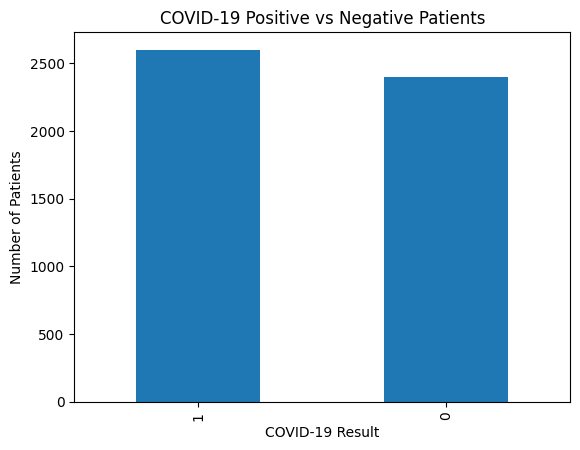

In [15]:
# Import pandas for data handling
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Create a bar chart for COVID-19 positive vs negative cases
df['covid_result'].value_counts().plot(kind='bar')

# Add title to the graph
plt.title('COVID-19 Positive vs Negative Patients')

# Label x-axis
plt.xlabel('COVID-19 Result')

# Label y-axis
plt.ylabel('Number of Patients')

# Display the graph
plt.show()
